# **Capstone project: Data-Driven Strategy for Increasing Employee Retention at Salifort Motors**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


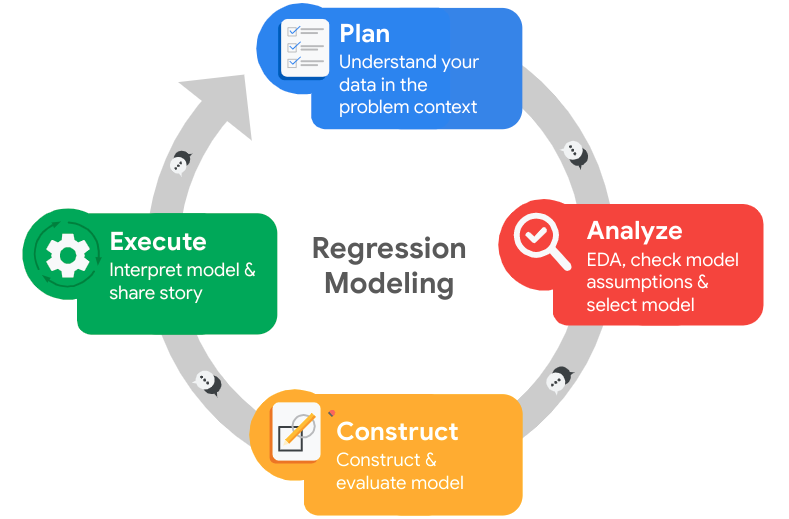

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [196]:
# Import packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from pathlib import Path
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Set base directory 
base_dir = Path(os.getcwd()).parent

# Set default figure directory
fig_dir = base_dir / "figures"
fig_dir.mkdir(parents=True, exist_ok=True)

# Set matplotlib backend to PDF-friendly (optional, for consistent rendering)
plt.rcParams["pdf.fonttype"] = 42  # Ensures text is saved as text (not paths)
plt.rcParams["ps.fonttype"] = 42

In [164]:
# Load the dataset
data_dir = base_dir / "data" 
data_file = data_dir / "raw" / "HR_capstone_dataset.csv"

# Read the CSV file into a pandas DataFrame
df0 = pd.read_csv(data_file)

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [165]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [166]:
# Gather descriptive statistics about the data
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [167]:
# Get the list of columns in the DataFrame
columns = df0.columns.tolist()

# Standardize column names
columns = [col.lower().replace(" ", "_") for col in columns]

# Rename 'left' column to 'has_left_company'
columns = ['has_left_company' if col == 'left' else col for col in columns]

# Update the DataFrame with standardized column names
df0.columns = columns

# Display the updated DataFrame with standardized column names
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,has_left_company,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Rename entries

In [168]:
# Rename entries in the 'has_left_company' column for easier interpretation
df0['has_left_company'] = df0['has_left_company'].replace({1: 'Left', 0: 'Stayed'})

# Convert promotion_last_5years to a categorical variable
df0['promotion_last_5years'] = df0['promotion_last_5years'].replace({1: 'Promoted', 0: 'Not promoted'})

# Convert work_accident to a categorical variable
df0['work_accident'] = df0['work_accident'].replace({1: 'Accident', 0: 'No Accident'})

### Check missing values

Check for any missing values in the data.

In [169]:
# Check for missing values
missing_values = df0.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
has_left_company         0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


### Check duplicates

Check for any duplicate entries in the data.

In [170]:
# Check for duplicates
duplicates = df0.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 3008


In [171]:
# Inspect some rows containing duplicates as needed
if duplicates > 0:
    print("Sample duplicate rows:")
    print(df0[df0.duplicated()].head())

Sample duplicate rows:
      satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_montly_hours  time_spend_company work_accident has_left_company  \
396                    139                   3   No Accident             Left   
866                    128                   3   No Accident             Left   
1317                   127                   3   No Accident             Left   
1368                   132                   3   No Accident             Left   
1461                   142                   3   No Accident             Left   

     promotion_last_5years  department  salary  
396           Not promoted       sales     low  
866           Not promote

In [172]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_cleaned = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df_cleaned.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,has_left_company,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,No Accident,Left,Not promoted,sales,low
1,0.80,0.86,5,262,6,No Accident,Left,Not promoted,sales,medium
2,0.11,0.88,7,272,4,No Accident,Left,Not promoted,sales,medium
3,0.72,0.87,5,223,5,No Accident,Left,Not promoted,sales,low
4,0.37,0.52,2,159,3,No Accident,Left,Not promoted,sales,low


### Check outliers

Check for outliers in the data.

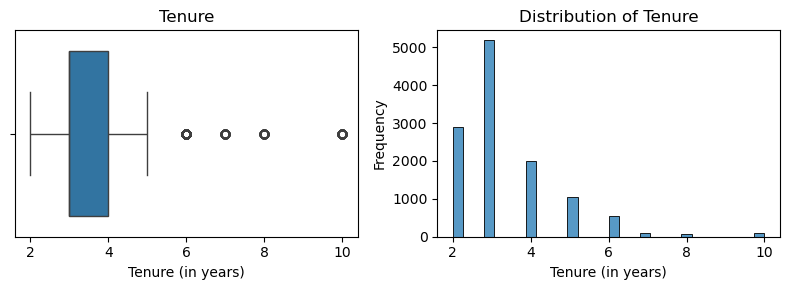

In [173]:
# Show time employee spent at the company
# Visuaize using boxplot & histogram

# Make subplots for boxplot and histogram
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
# Boxplot for tenure
sns.boxplot(x='time_spend_company', data=df_cleaned, ax=axes[0])
axes[0].set_title('Tenure')
axes[0].set_xlabel('Tenure (in years)')
# Histogram for tenure
sns.histplot(df_cleaned['time_spend_company'], bins=30, ax=axes[1])
axes[1].set_title('Distribution of Tenure')
axes[1].set_xlabel('Tenure (in years)')
axes[1].set_ylabel('Frequency') 
# Save the figure
plt.tight_layout()
plt.savefig(fig_dir / 'tenure_distribution.pdf')
plt.show()

In [174]:
# Determine the number of rows containing outliers
# Calculate the IQR for 'time_spend_company'
Q1 = df_cleaned['time_spend_company'].quantile(0.25)
Q3 = df_cleaned['time_spend_company'].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Count the number of outliers
outliers_count = df_cleaned[(df_cleaned['time_spend_company'] < lower_bound) | (df_cleaned['time_spend_company'] > upper_bound)].shape[0]
print(f"Number of outliers in 'time_spend_company': {outliers_count}")
# Remove outliers from the DataFrame
df_no_outliers = df_cleaned[(df_cleaned['time_spend_company'] >= lower_bound) & (df_cleaned['time_spend_company'] <= upper_bound)]

Number of outliers in 'time_spend_company': 824


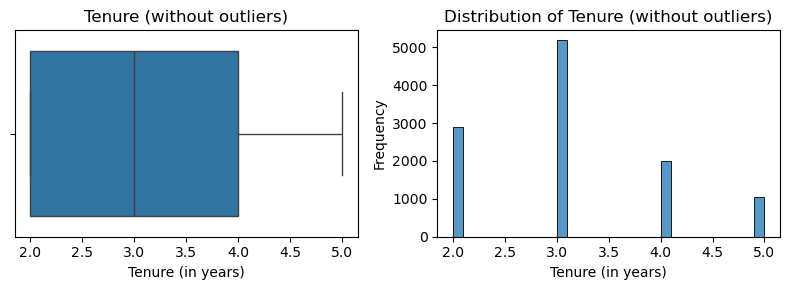

In [175]:
# Replot the boxplot and histogram without outliers
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
# Boxplot for tenure without outliers
sns.boxplot(x='time_spend_company', data=df_no_outliers, ax=axes[0])
axes[0].set_title('Tenure (without outliers)')
axes[0].set_xlabel('Tenure (in years)')
# Histogram for tenure without outliers
sns.histplot(df_no_outliers['time_spend_company'], bins=30, ax=axes[1])
axes[1].set_title('Distribution of Tenure (without outliers)')
axes[1].set_xlabel('Tenure (in years)')
axes[1].set_ylabel('Frequency')
# Save the figure
plt.tight_layout()
plt.savefig(fig_dir / 'tenure_distribution_no_outliers.pdf')
plt.show()

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [176]:
# Get numbers of people who left vs. stayed
left_count = df_cleaned['has_left_company'].value_counts()
print("Number of Employees who left vs. stayed:")
print(left_count)

# Get percentages of people who left vs. stayed
left_percentage = left_count / left_count.sum() * 100
print("\nPercentage of people who left vs. stayed:")
print(left_percentage)


Number of Employees who left vs. stayed:
has_left_company
Stayed    10000
Left       1991
Name: count, dtype: int64

Percentage of people who left vs. stayed:
has_left_company
Stayed    83.39588
Left      16.60412
Name: count, dtype: float64


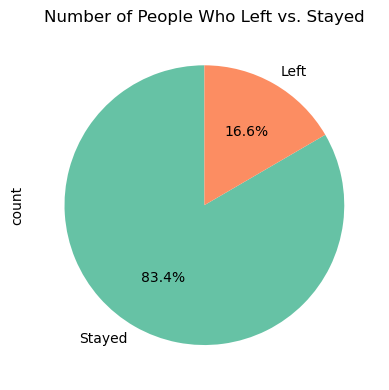

In [177]:
# Plot the number of people who left vs. stayed as pie chart
plt.figure(figsize=(6, 4))
df_cleaned['has_left_company'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Number of People Who Left vs. Stayed')
plt.tight_layout()
plt.savefig(fig_dir / 'left_vs_stayed.pdf')
plt.show()

### Data visualizations

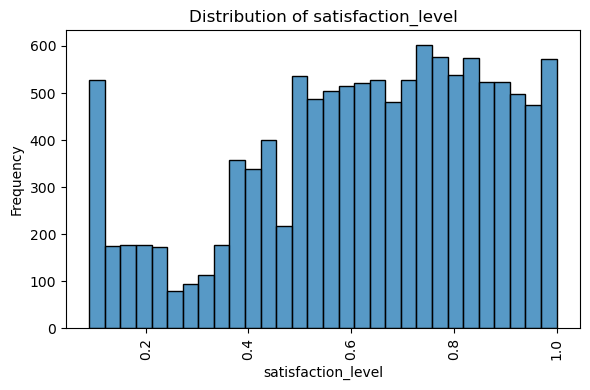

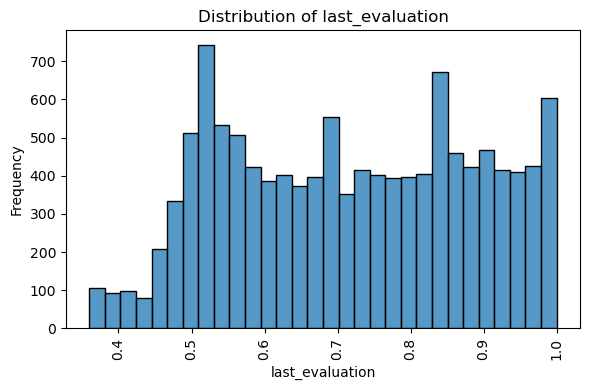

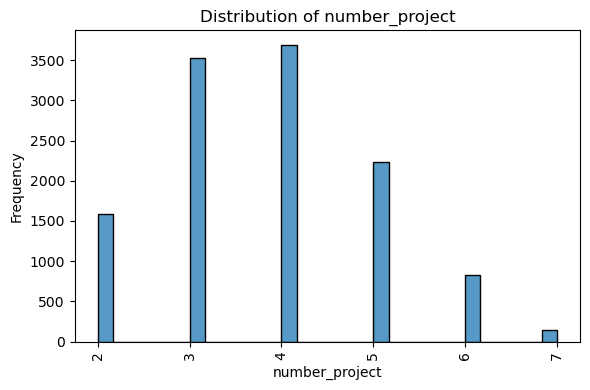

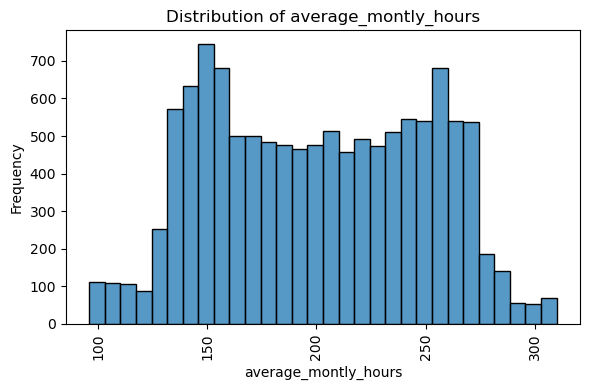

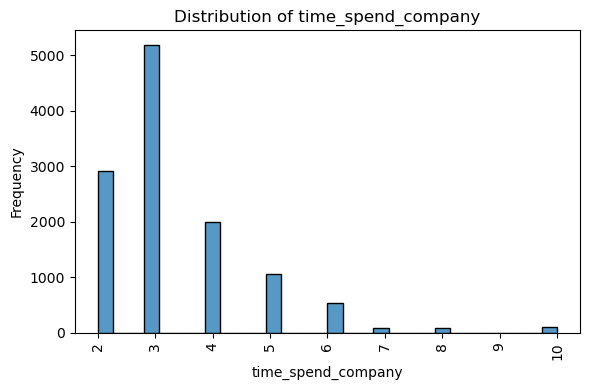

In [178]:
# We create histograms for each continuous variable
continuous_vars = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_cleaned[var], bins=30)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(fig_dir / f'{var}_distribution.pdf')
    plt.show()

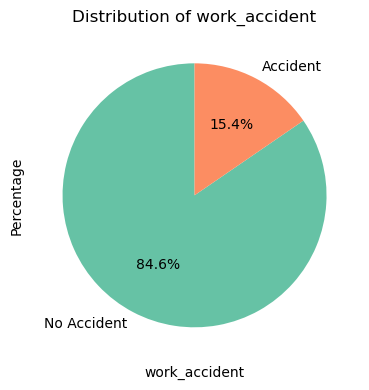

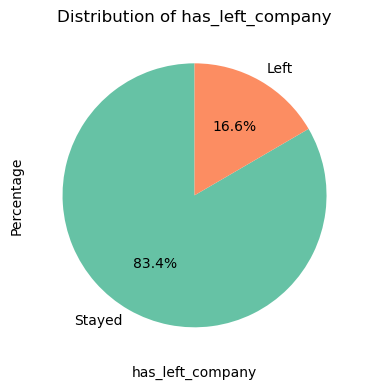

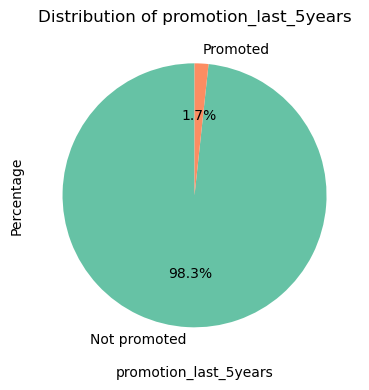

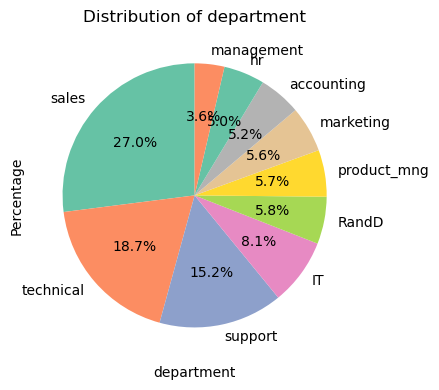

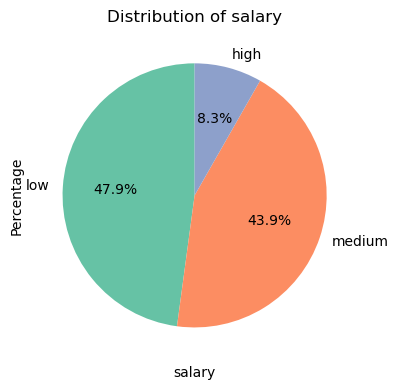

In [179]:
## Create plot for all categorical variables
categorical_vars = df_cleaned.select_dtypes(include=['object']).columns
for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    # Make pie chart for categorical variables
    df_cleaned[var].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Percentage')
    plt.tight_layout()
    plt.savefig(fig_dir / f'{var}_distribution.pdf')
    plt.show()

  work_accident has_left_company  percentage
0      Accident             Left    5.675676
1   No Accident             Left   18.597771
2      Accident           Stayed   94.324324
3   No Accident           Stayed   81.402229


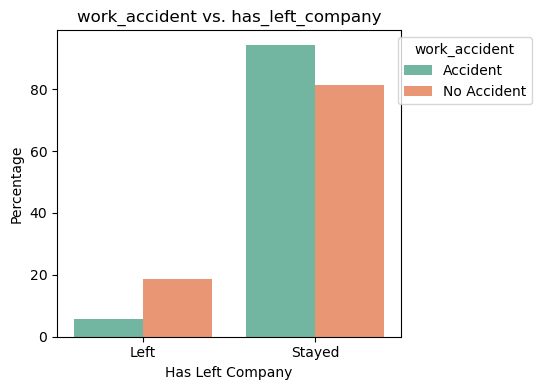

  promotion_last_5years has_left_company  percentage
0          Not promoted             Left   16.822192
1              Promoted             Left    3.940887
2          Not promoted           Stayed   83.177808
3              Promoted           Stayed   96.059113


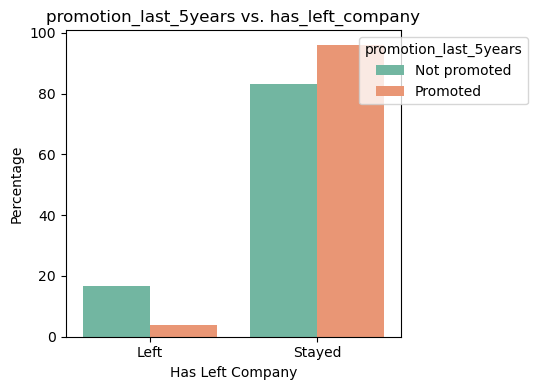

     department has_left_company  percentage
0            IT             Left   16.188525
1         RandD             Left   12.247839
2    accounting             Left   17.552335
3            hr             Left   18.801997
4    management             Left   11.926606
5     marketing             Left   16.641902
6   product_mng             Left   16.034985
7         sales             Left   16.980550
8       support             Left   17.133443
9     technical             Left   17.379679
10           IT           Stayed   83.811475
11        RandD           Stayed   87.752161
12   accounting           Stayed   82.447665
13           hr           Stayed   81.198003
14   management           Stayed   88.073394
15    marketing           Stayed   83.358098
16  product_mng           Stayed   83.965015
17        sales           Stayed   83.019450
18      support           Stayed   82.866557
19    technical           Stayed   82.620321


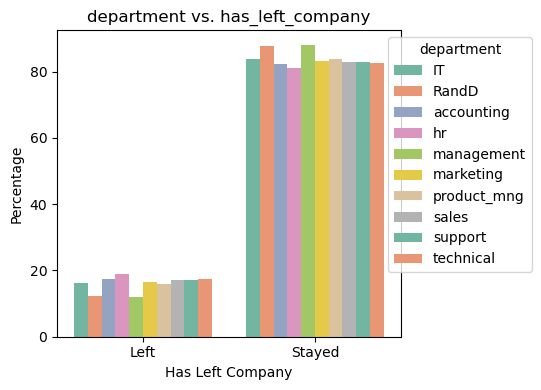

   salary has_left_company  percentage
0    high             Left    4.848485
1     low             Left   20.452962
2  medium             Left   14.616993
3    high           Stayed   95.151515
4     low           Stayed   79.547038
5  medium           Stayed   85.383007


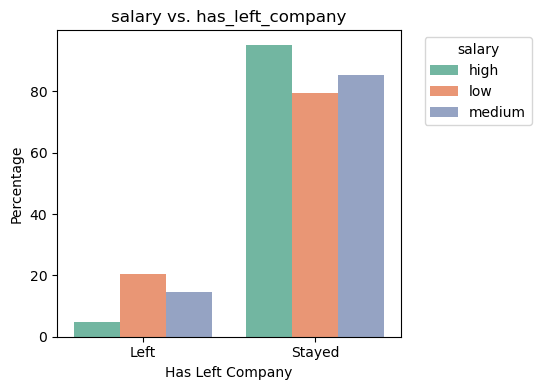

In [180]:
# Now we visualize the relationships between the target variable (has_left_company) and each of the categorical variables
for target_var in categorical_vars:
    if target_var != 'has_left_company':  # Avoid plotting the target variable against itself
        # Compute percentage of people who left vs. stayed for each category (group by target variable)
        category_percentages = df_cleaned.groupby(target_var)['has_left_company'].value_counts(normalize=True).unstack().fillna(0) * 100
        category_percentages = category_percentages.reset_index()
        # Pivot the DataFrame for easier plotting
        category_percentages = category_percentages.melt(id_vars=target_var, var_name='has_left_company', value_name='percentage')
        print(category_percentages)
        plt.figure(figsize=(6, 4))
        sns.barplot(data=category_percentages, x='has_left_company', y='percentage', hue=target_var, palette='Set2')
        plt.title(f'{target_var} vs. has_left_company')
        plt.xlabel('Has Left Company')
        plt.ylabel('Percentage')
        # Put legend outside the plot
        plt.legend(title=target_var, loc='upper right', bbox_to_anchor=(1.4, 1))
        plt.tight_layout()
        plt.savefig(fig_dir / f'{target_var}_vs_has_left_company.pdf')
        plt.show()

/var/folders/22/sjkvvcj17_gdnvz15k1nj1800000gn/T/ipykernel_94631/980083550.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_left_company', y=cont_var, data=df_cleaned, palette='Set2')


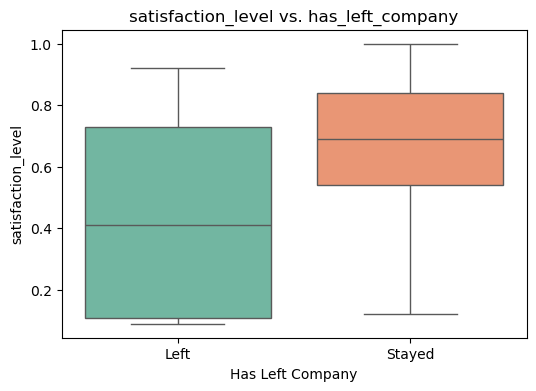

/var/folders/22/sjkvvcj17_gdnvz15k1nj1800000gn/T/ipykernel_94631/980083550.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_left_company', y=cont_var, data=df_cleaned, palette='Set2')


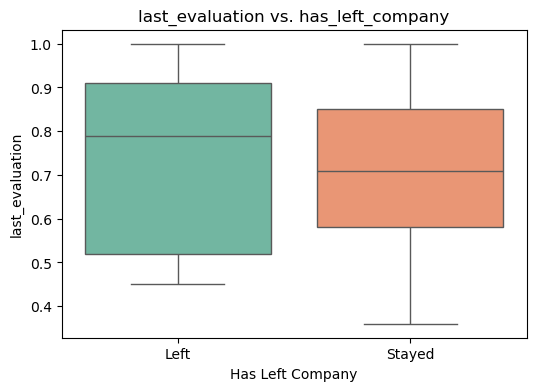

/var/folders/22/sjkvvcj17_gdnvz15k1nj1800000gn/T/ipykernel_94631/980083550.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_left_company', y=cont_var, data=df_cleaned, palette='Set2')


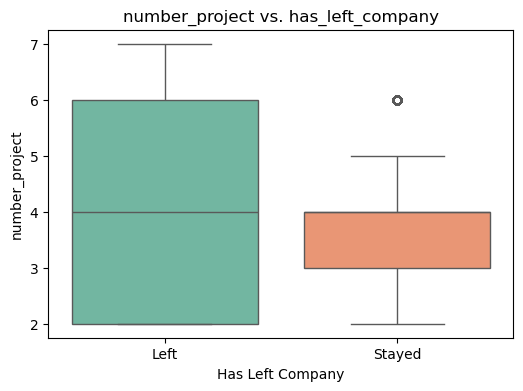

/var/folders/22/sjkvvcj17_gdnvz15k1nj1800000gn/T/ipykernel_94631/980083550.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_left_company', y=cont_var, data=df_cleaned, palette='Set2')


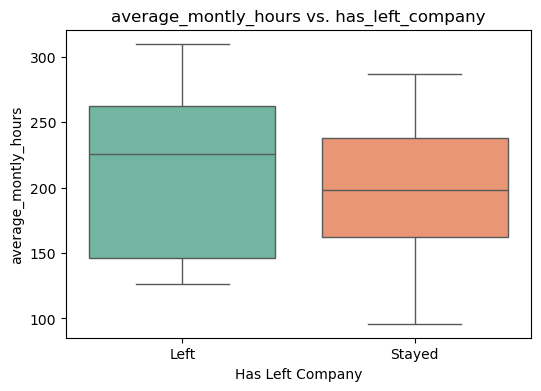

/var/folders/22/sjkvvcj17_gdnvz15k1nj1800000gn/T/ipykernel_94631/980083550.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_left_company', y=cont_var, data=df_cleaned, palette='Set2')


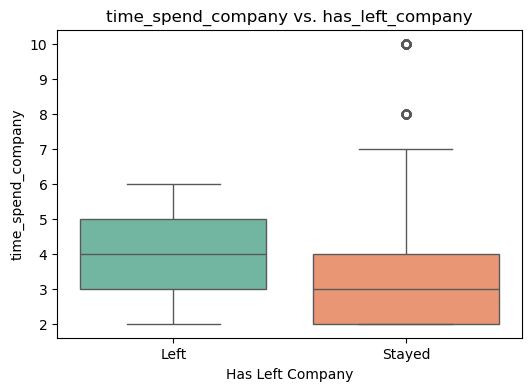

In [181]:
# Do the same for continuous variables
for cont_var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='has_left_company', y=cont_var, data=df_cleaned, palette='Set2')
    plt.title(f'{cont_var} vs. has_left_company')
    plt.xlabel('Has Left Company')
    plt.ylabel(cont_var)
    plt.tight_layout
    plt.savefig(fig_dir / f'{cont_var}_vs_has_left_company.pdf')
    plt.show()

#### Investigate accident by department

     department work_accident  percentage
0            IT      Accident   14.241803
1         RandD      Accident   17.146974
2    accounting      Accident   14.009662
3            hr      Accident   13.311148
4    management      Accident   16.513761
5     marketing      Accident   16.047548
6   product_mng      Accident   15.889213
7         sales      Accident   15.375116
8       support      Accident   16.419550
9     technical      Accident   15.106952
10           IT   No Accident   85.758197
11        RandD   No Accident   82.853026
12   accounting   No Accident   85.990338
13           hr   No Accident   86.688852
14   management   No Accident   83.486239
15    marketing   No Accident   83.952452
16  product_mng   No Accident   84.110787
17        sales   No Accident   84.624884
18      support   No Accident   83.580450
19    technical   No Accident   84.893048


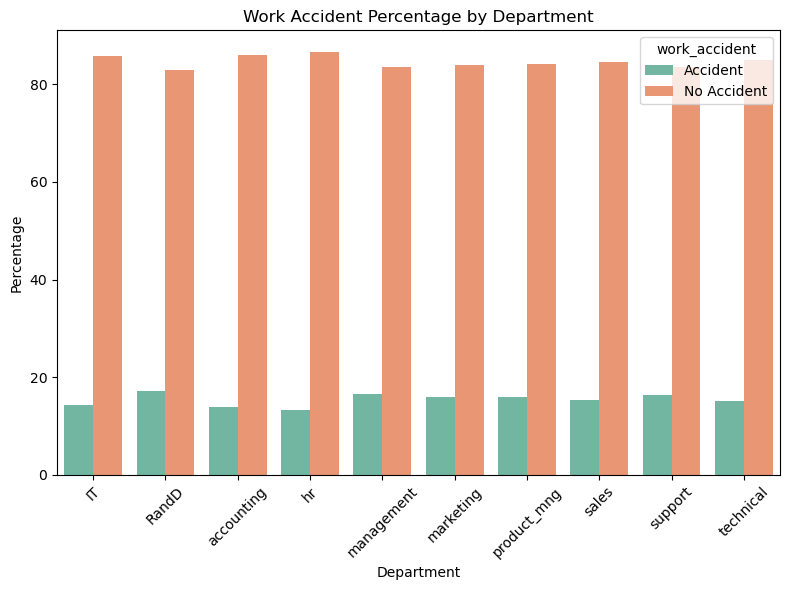

In [182]:
# Compute percentage of work accidents by department
work_accident_percentage = df_cleaned.groupby('department')['work_accident'].value_counts(normalize=True).unstack().fillna(0) * 100
work_accident_percentage = work_accident_percentage.reset_index()
work_accident_percentage = work_accident_percentage.melt(id_vars='department', var_name='work_accident', value_name='percentage')
print(work_accident_percentage)
plt.figure(figsize=(8, 6))
sns.barplot(data=work_accident_percentage, x='department', y='percentage', hue='work_accident', palette='Set2')
plt.title('Work Accident Percentage by Department')
plt.xlabel('Department')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(fig_dir / 'work_accident_percentage_by_department.pdf')

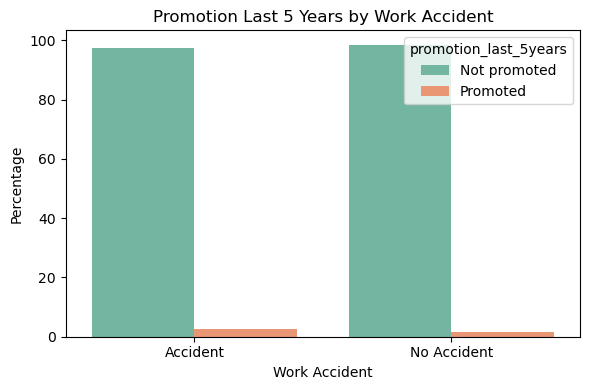

Chi² = 10.055, p = 0.0015


In [194]:
promotion_accident_percentage = (
    df_cleaned
    .groupby('work_accident')['promotion_last_5years']
    .value_counts(normalize=True)
    .rename('percentage')              # rename the Series to a column
    .mul(100)                          # scale to percent
    .unstack(fill_value=0)             # pivot promotion values into columns
    .reset_index()                     # flatten the index
    .melt(
        id_vars='work_accident',
        var_name='promotion_last_5years',
        value_name='percentage'
    )
)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=promotion_accident_percentage,
    x='work_accident',
    y='percentage',
    hue='promotion_last_5years',
    palette='Set2'
)
plt.title('Promotion Last 5 Years by Work Accident')
plt.xlabel('Work Accident')
plt.ylabel('Percentage')
plt.tight_layout()

# Save (assuming `fig_dir` is defined as Path object)
plt.savefig(fig_dir / 'promotion_last_5years_by_work_accident.pdf')
plt.show()

# Chi-squared test
contingency = pd.crosstab(df_cleaned['work_accident'], df_cleaned['promotion_last_5years'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi² = {chi2:.3f}, p = {p:.4f}")


### Assess multicollinearity in data

/var/folders/22/sjkvvcj17_gdnvz15k1nj1800000gn/T/ipykernel_94631/2969187808.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Variable', data=vif.sort_values('VIF', ascending=False), palette='viridis')


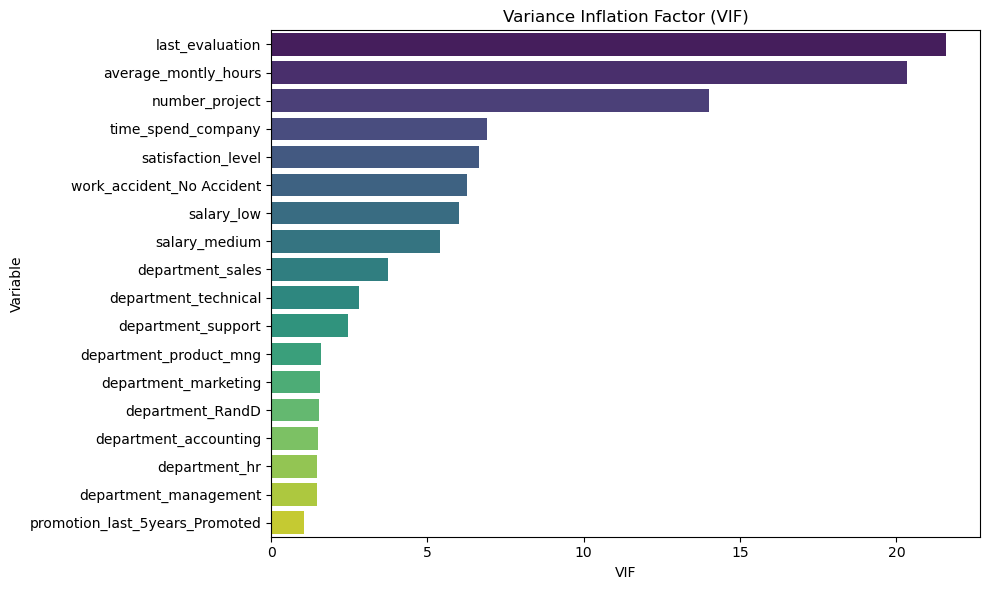

In [201]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Separate predictors from target
predictor_vars = df0.columns[df0.columns != 'has_left_company']

# One-hot encode categorical variables
X = pd.get_dummies(df0[predictor_vars], drop_first=True)

# Convert to float to avoid TypeError
X = X.astype(float)

# Compute VIF
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Plot VIF values sort from highest to lowest
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Variable', data=vif.sort_values('VIF', ascending=False), palette='viridis')
plt.title('Variance Inflation Factor (VIF)')
plt.xlabel('VIF')
plt.ylabel('Variable')
plt.tight_layout()
plt.savefig(fig_dir / 'vif_plot.pdf')
plt.show()

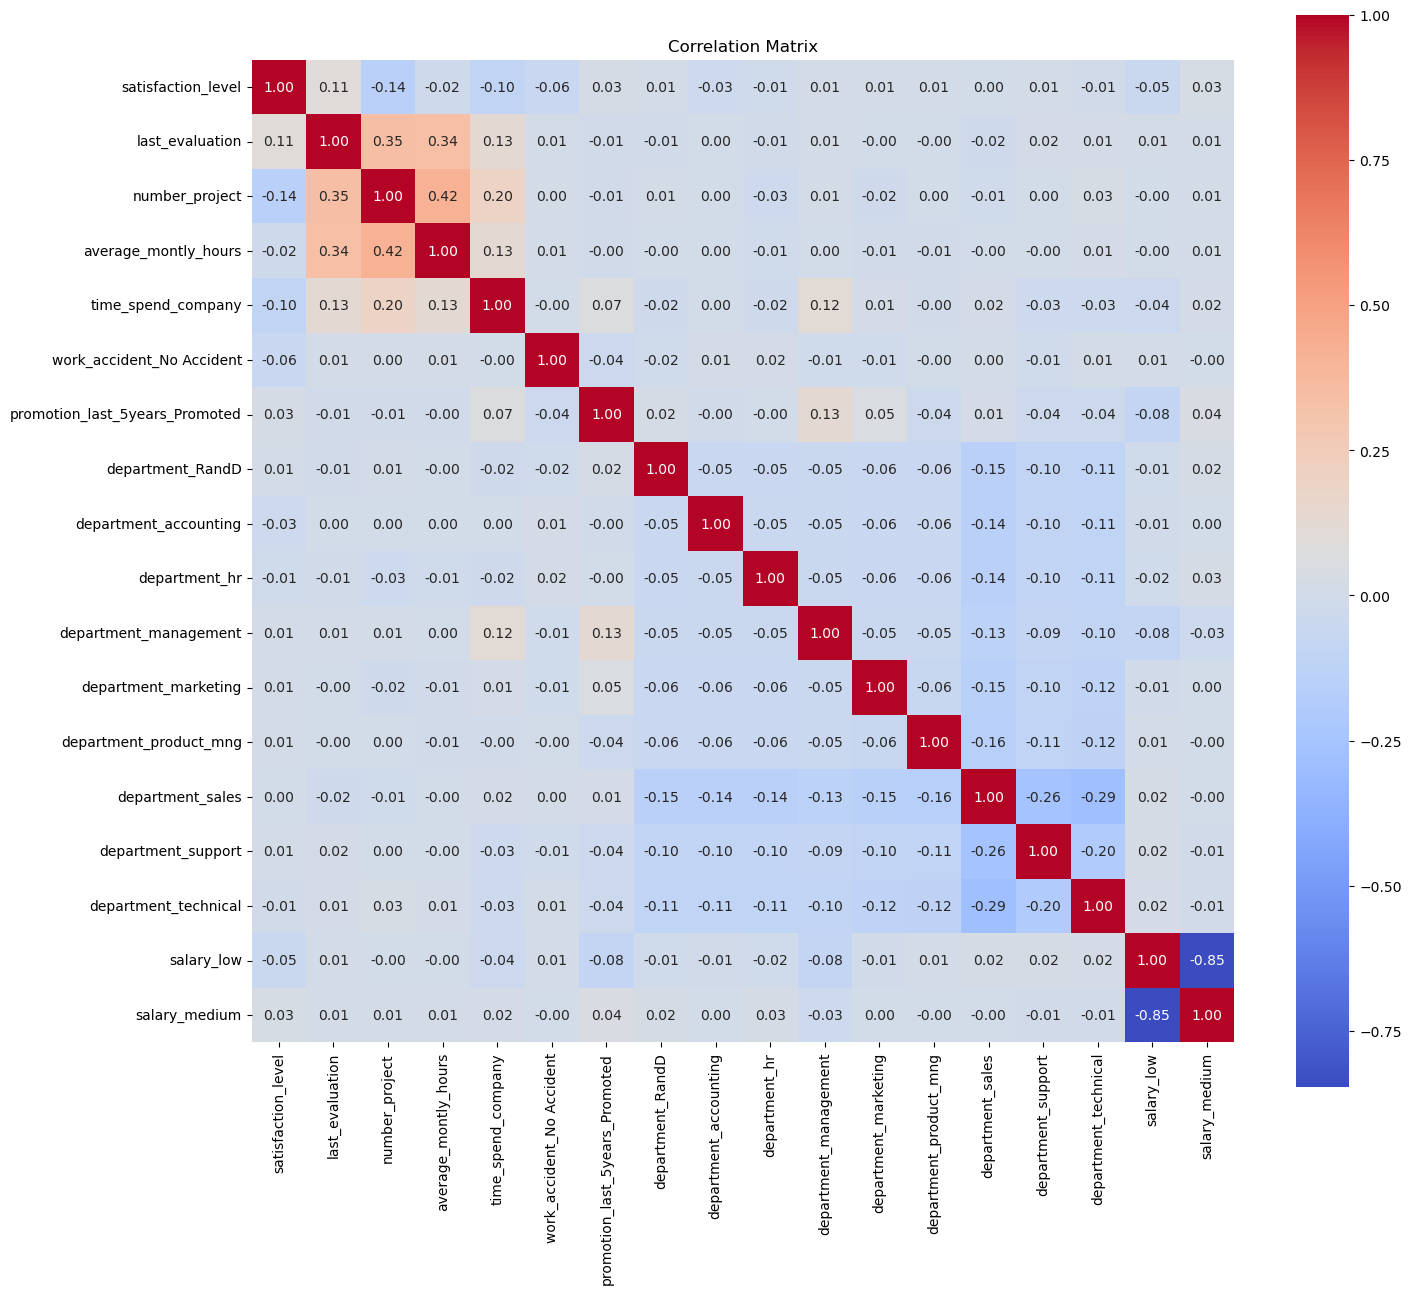

In [208]:
## Look at correlation matrix to assess multicollinearity
# Calculate the correlation matrix
correlation_matrix = X.corr()  
# Plot the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig(fig_dir / 'correlation_matrix.pdf')
plt.show()

### Insights of EDA

Employees who left the company showed distinct patterns compared to those who stayed:

- **Workload & Performance**:
  - They had higher average monthly hours, more projects, and higher evaluation scores.

- **Career Progression**  
  - Less likely to have been promoted in the last 5 years  
  - Lower salaries  

- **Job Satisfaction & Tenure**  
  - Significantly lower satisfaction levels  
  - Spent more time with the company on average  

- **Department Trends**  
  - Higher turnover in **support**, **accounting**, and **HR**  
  - Lower turnover in **R&D** and **management**  

- **Work Accidents**  
  - Small but significant effect: employees who had a work accident were **slightly more likely to be promoted**


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



- Outcome variable is categorical (either they left or stayed)
- Observations are indepedent of each other (One could argue either way, maybe there are smaller groups of people that left or it goes in waves)
- We observe colinearity between a couple of variables such as (last_evaluation, number_of_projects & average monthly hours). Interpretations is higher that the higher number of projects is, the more the employee works & the more often he gets evaluated because he is part of multiple projects


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

We aim to predict whether an employee will leave or stay at the company. This is a **supervised machine learning task**, because:

- We have labeled data (employees who stayed or left),
- And we want to learn a model from that data to predict future outcomes.

Since the outcome variable has only two possible values (e.g., *leave* vs. *stay*, or *1* vs. *0*), this is specifically a:

- **Binary classification task**


### Identify the types of models most appropriate for this task.

Common algorithms for binary classification include:
- Logistic Regression
- Random Forest
- Support Vector Machine (SVM)
- Gradient Boosted Trees (e.g., XGBoost, LightGBM)
- Neural Networks (for more complex data)



### Modeling

#### Preprocessing

In [220]:
# We will employ the explanatory power of logistic regression
# To test the model, we will split the data into training and testing sets
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Define the target variable
target_var = 'has_left_company'
y = df0[target_var].replace({'Left': 1, 'Stayed': 0})  # Convert to binary

# Given that we observe a heavily imbalanced dataset and not too many observations,
# we will employ upsampling to ensure that both classes are represented in the training and testing sets
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df0[df0[target_var] == 'Stayed']
df_minority = df0[df0[target_var] == 'Left']

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # Sample with replacement
                                 n_samples=len(df_majority),  # Match number in majority class
                                 random_state=42)  # Reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the upsampled DataFrame
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

/var/folders/22/sjkvvcj17_gdnvz15k1nj1800000gn/T/ipykernel_94631/1513575396.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df0[target_var].replace({'Left': 1, 'Stayed': 0})  # Convert to binary


#### One-hot encode categorical variables

In [221]:
X_upsampled = df_upsampled.drop(columns=[target_var])
y_upsampled = df_upsampled[target_var].replace({'Left': 1, 'Stayed': 0})  # Convert to binary

X_upsampled = pd.get_dummies(X_upsampled, drop_first=True)
X_upsampled = X_upsampled.astype(float)

/var/folders/22/sjkvvcj17_gdnvz15k1nj1800000gn/T/ipykernel_94631/1845552619.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_upsampled = df_upsampled[target_var].replace({'Left': 1, 'Stayed': 0})  # Convert to binary


#### Normalizing the data without leakage

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split first
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.2, stratify=y_upsampled, random_state=42)

# Then fit scaler on training data only
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Use the same scaler to transform test data
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#### Model fitting

In [240]:
# Define the model
X_train_scaled = sm.add_constant(X_train_scaled)  # Adds a constant term to the predictor
model = sm.Logit(y_train.values, X_train_scaled)

# Fit the model
result = model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.518240
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                18284
Model:                          Logit   Df Residuals:                    18265
Method:                           MLE   Df Model:                           18
Date:                Sun, 03 Aug 2025   Pseudo R-squ.:                  0.2523
Time:                        21:04:58   Log-Likelihood:                -9475.5
converged:                       True   LL-Null:                       -12674.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.1961      0.136    -16.102     

#### Model evaluation

In [ ]:
# Evaluate the model's performance
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
X_test_scaled = sm.add_constant(X_test_scaled)  # Adds a constant term to the predictor
y_pred = result.predict(X_test_scaled)

# Classification report
class_report = classification_report(y_test, (y_pred > 0.5).astype(int))
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2286
           1       0.76      0.80      0.78      2286

    accuracy                           0.78      4572
   macro avg       0.78      0.78      0.78      4572
weighted avg       0.78      0.78      0.78      4572



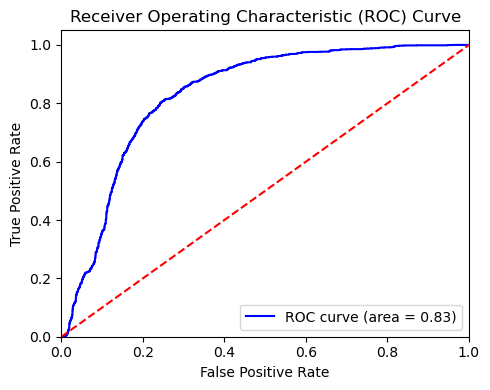

In [242]:
# Plot the AUROC-ROC curve
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr) 
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig(fig_dir / 'roc_curve.pdf')
plt.show()

Confusion Matrix:
[[1721  565]
 [ 447 1839]]


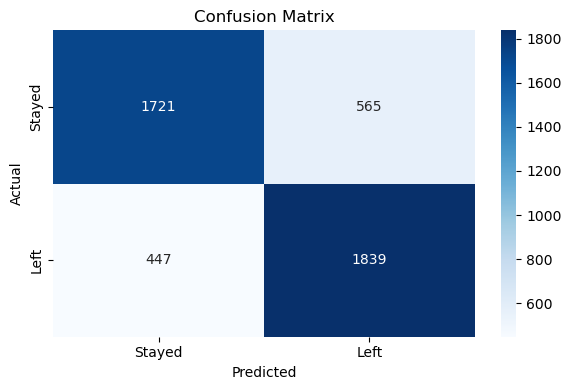

In [243]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, (y_pred > 0.5).astype(int))
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig(fig_dir / 'confusion_matrix.pdf')
plt.show()

#### Plot odds ratios of the logistic regression model

In [ ]:
# Obtain the coefficients of the logistic regression model

# Get the 90% confidence interval of the *log* coefficients
conf = result.conf_int(alpha=0.10)  # 90% CI → 5% and 95%
conf.columns = ['5%', '95%']

# Add the point estimate (coefficient)
conf['Coefficient'] = result.params

# Exponentiate coefficients and CI bounds
conf['Odds Ratio'] = np.exp(conf['Coefficient'])
conf['5%'] = np.exp(conf['5%'])
conf['95%'] = np.exp(conf['95%'])
conf

,5%,95%,Coefficient,Odds Ratio
const,0.088880,0.139208,-2.196129,0.111233
satisfaction_level,0.015845,0.020304,-4.020908,0.017937
last_evaluation,1.866698,2.479126,0.766038,2.151227
number_project,0.112728,0.153639,-2.027964,0.131603
average_montly_hours,2.586062,3.590744,1.114248,3.047275
time_spend_company,33.870091,51.144482,3.728593,41.620527
work_accident_No Accident,3.773860,4.666241,1.434226,4.196396
promotion_last_5years_Promoted,0.136273,0.266040,-1.658601,0.190405
department_RandD,0.699803,0.990837,-0.183081,0.832701
department_accounting,1.133716,1.579897,0.291430,1.338340


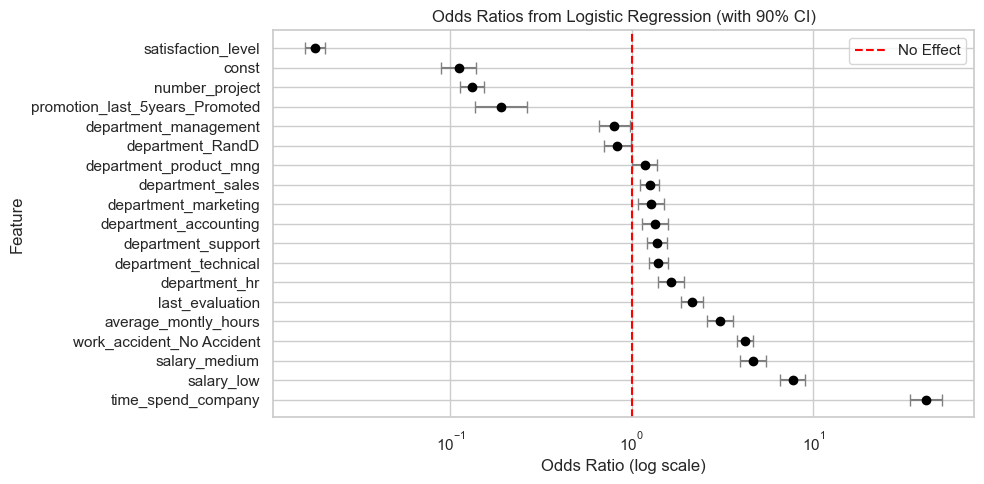

In [293]:
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

# Reset index for plotting
df = conf.reset_index().rename(columns={'index': 'Feature'})
# Sort by Odds Ratio for better visualization
df = df.sort_values(by='Odds Ratio', ascending=False)

# Plot horizontal error bars
plt.errorbar(
    x=df['Odds Ratio'],
    y=df['Feature'],
    xerr=[df['Odds Ratio'] - df['5%'], df['95%'] - df['Odds Ratio']],
    fmt='o',
    color='black',
    ecolor='gray',
    capsize=4
)

# Log scale for better visual balance
plt.xscale('log')

# Reference line at OR = 1 (no effect)
plt.axvline(x=1, color='red', linestyle='--', label='No Effect')

plt.xlabel('Odds Ratio (log scale)')
plt.ylabel('Feature')
plt.title('Odds Ratios from Logistic Regression (with 90% CI)')
plt.tight_layout()
plt.legend()
plt.savefig(fig_dir / 'odds_ratio_with_ci_logscale.pdf')
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]